IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

FILE_PATH = './Retail_sales.csv'
sales_df = pd.read_csv(FILE_PATH)

#1 CHECKING MISSING VALUE

In [2]:
sales_df.info()
sales_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

#2 DETECT AND REMOVE OUTLIER

In [3]:
# Convert 'Date' column to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Now let's calculate summary statistics for the numeric columns to check for potential outliers
numeric_columns = ['Units Sold', 'Sales Revenue (USD)', 'Discount Percentage', 'Marketing Spend (USD)']
sales_df[numeric_columns].describe()




Units Sold  Sales Revenue (USD)  Discount Percentage  \
count  30000.000000         30000.000000         30000.000000   
mean       6.161967          2749.509593             2.973833   
std        3.323929          2568.639288             5.974530   
min        0.000000             0.000000             0.000000   
25%        4.000000           882.592500             0.000000   
50%        6.000000          1902.420000             0.000000   
75%        8.000000          3863.920000             0.000000   
max       56.000000         27165.880000            20.000000   

       Marketing Spend (USD)  
count           30000.000000  
mean               49.944033  
std                64.401655  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%               100.000000  
max               199.000000

In [4]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers from 'Units Sold' column
cleaned_df = sales_df.copy()
for col in numeric_columns:
    cleaned_df = remove_outliers(cleaned_df, col)

initial_rows = sales_df.shape[0]
final_rows = cleaned_df.shape[0]
(initial_rows, final_rows), cleaned_df.describe()



((30000, 21454),
          Product ID                           Date    Units Sold  \
 count  2.145400e+04                          21454  21454.000000   
 mean   4.526390e+07  2022-12-29 15:12:58.260464384      5.726112   
 min    3.636541e+06            2022-01-01 00:00:00      0.000000   
 25%    2.228600e+07            2022-06-28 06:00:00      4.000000   
 50%    4.423471e+07            2023-01-01 12:00:00      6.000000   
 75%    6.559352e+07            2023-06-28 00:00:00      7.000000   
 max    9.628253e+07            2024-01-01 00:00:00     14.000000   
 std    2.784600e+07                            NaN      2.746407   
 
        Sales Revenue (USD)  Discount Percentage  Marketing Spend (USD)  
 count         21454.000000              21454.0           21454.000000  
 mean           2415.001464                  0.0              49.977440  
 min               0.000000                  0.0               0.000000  
 25%             875.260000                  0.0               0

#3 Visualizing Cleaned Data

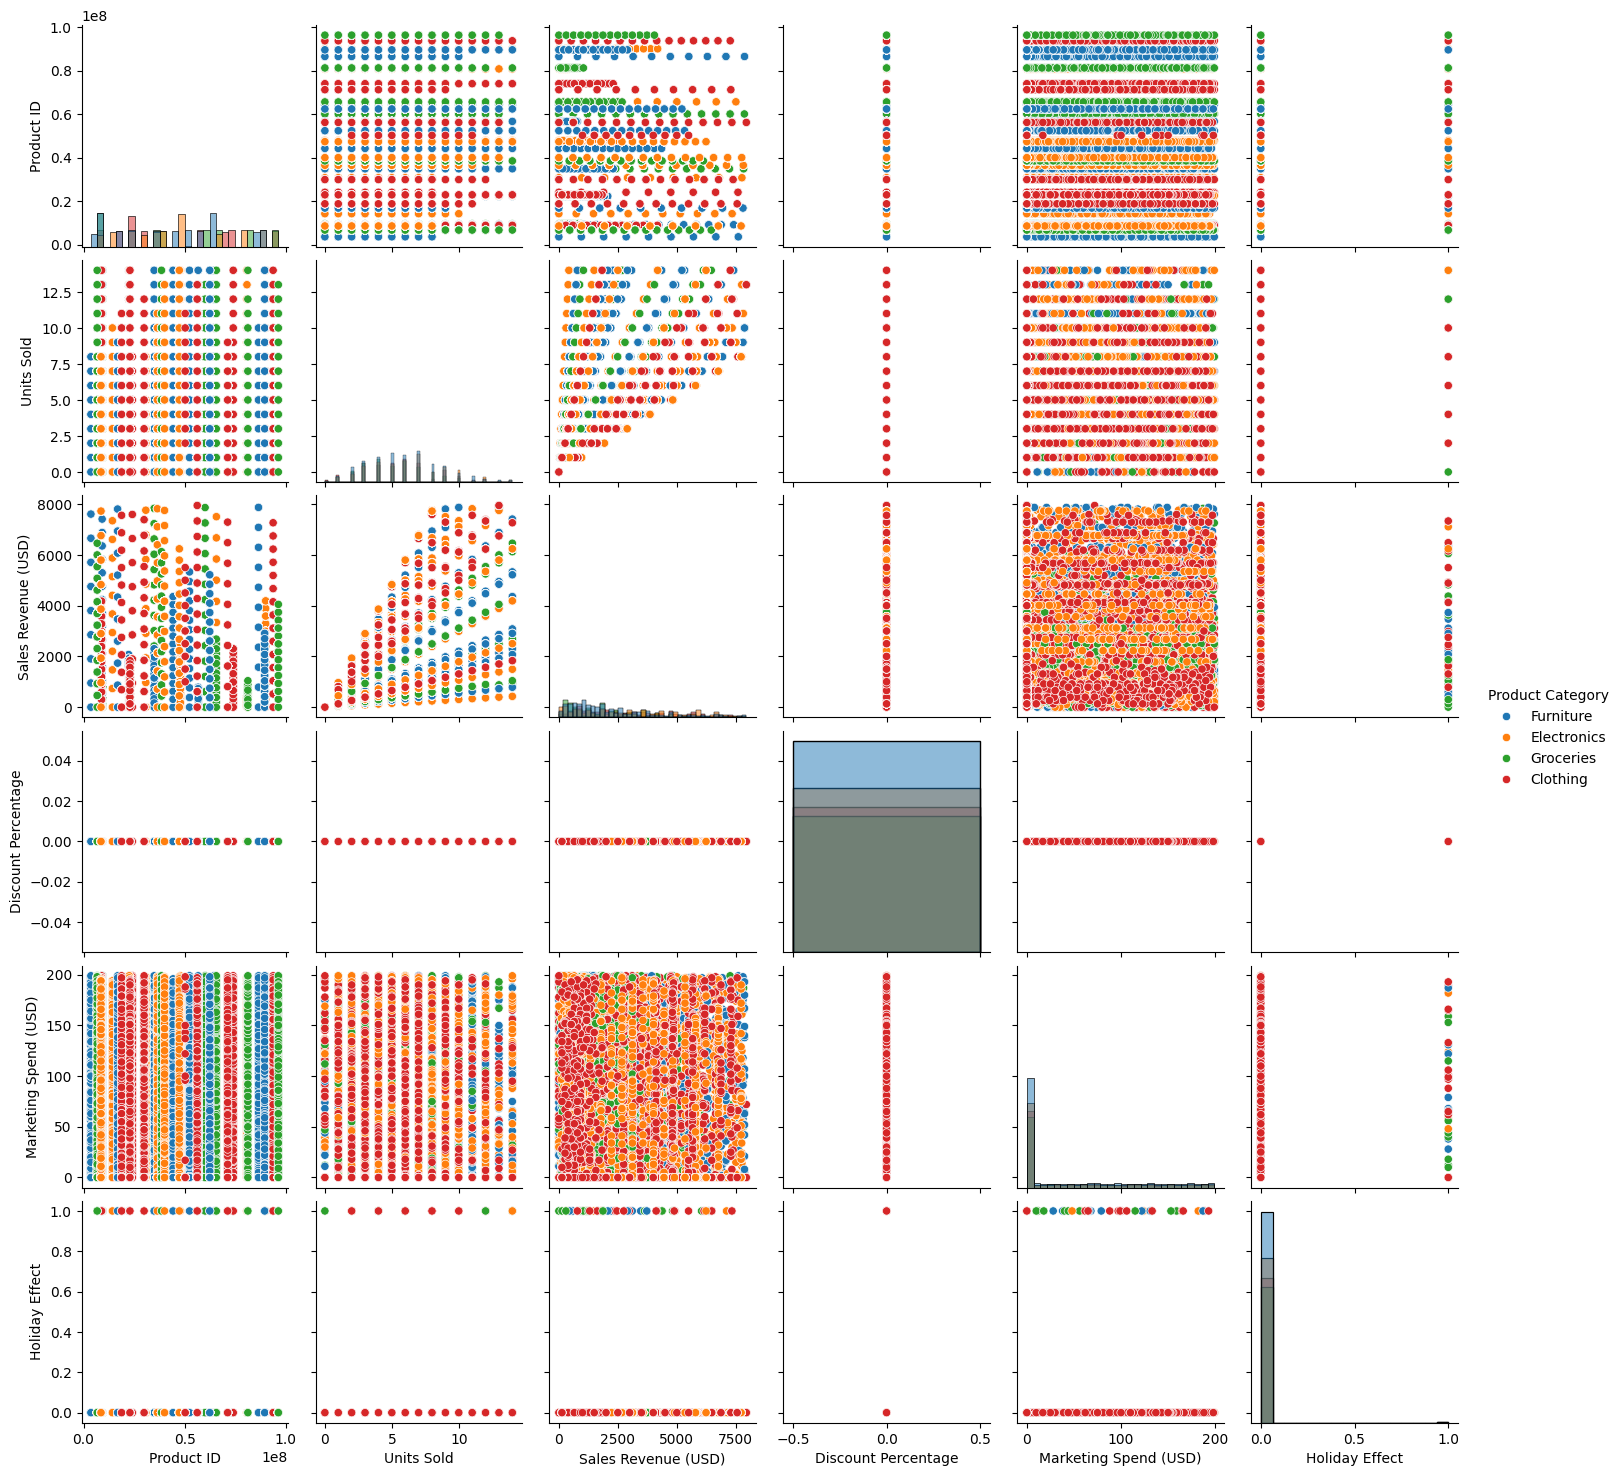

In [5]:
sns.pairplot(cleaned_df[cleaned_df['Product Category'] != ''], hue='Product Category', diag_kind='hist')

# cleaned_df = cleaned_df.drop(['Product ID', 'Date'], axis=1)


#4 Checking Variance, Covariance, and Correlation between Units Sold and Sales Revenue

In [6]:
numeric_columns = ['Units Sold', 'Sales Revenue (USD)', 'Marketing Spend (USD)']
cleaned_df[numeric_columns].corr()

Units Sold  Sales Revenue (USD)  Marketing Spend (USD)
Units Sold               1.000000             0.489028              -0.002281
Sales Revenue (USD)      0.489028             1.000000              -0.003993
Marketing Spend (USD)   -0.002281            -0.003993               1.000000

In [7]:
cleaned_df[numeric_columns].cov()


Units Sold  Sales Revenue (USD)  Marketing Spend (USD)
Units Sold                7.542751         2.598509e+03              -0.403886
Sales Revenue (USD)    2598.509245         3.743266e+06            -498.050632
Marketing Spend (USD)    -0.403886        -4.980506e+02            4156.783624

In [8]:
cleaned_df[numeric_columns].var()

Units Sold               7.542751e+00
Sales Revenue (USD)      3.743266e+06
Marketing Spend (USD)    4.156784e+03
dtype: float64

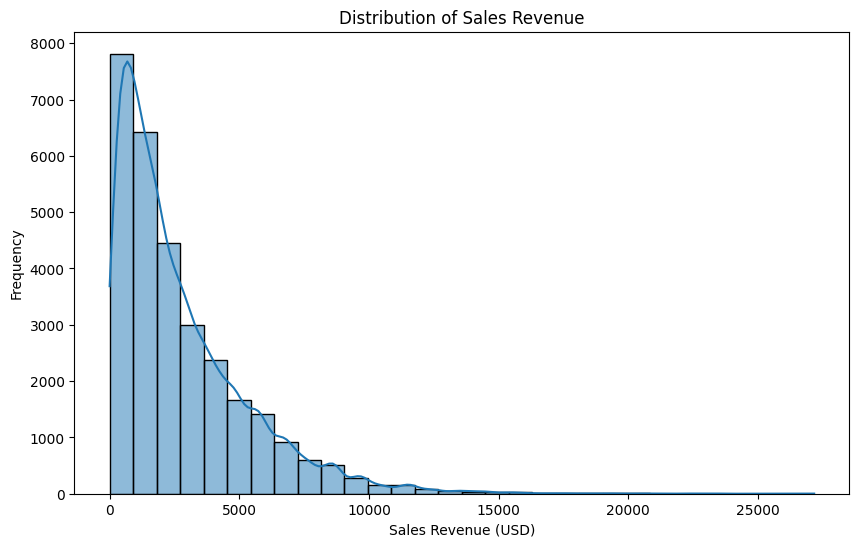

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_df['Sales Revenue (USD)'], bins=30, kde=True)
plt.title('Distribution of Sales Revenue')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

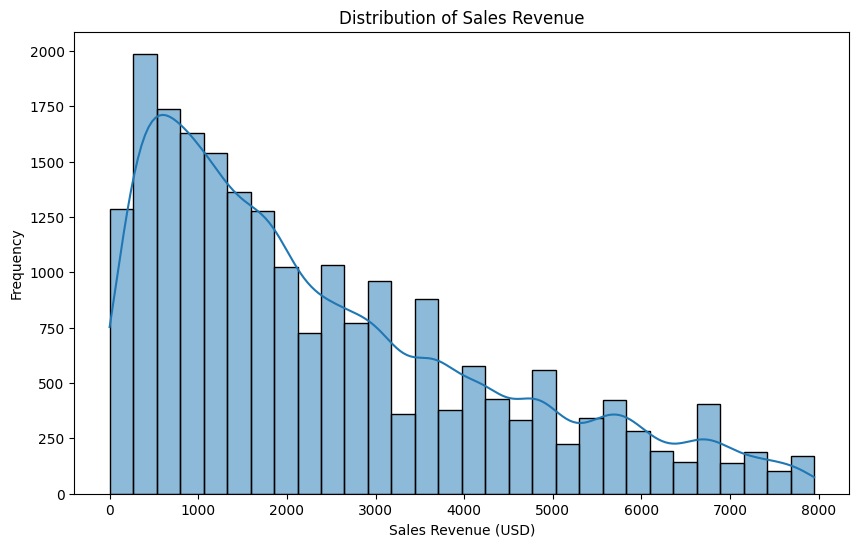

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['Sales Revenue (USD)'], bins=30, kde=True)
plt.title('Distribution of Sales Revenue')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

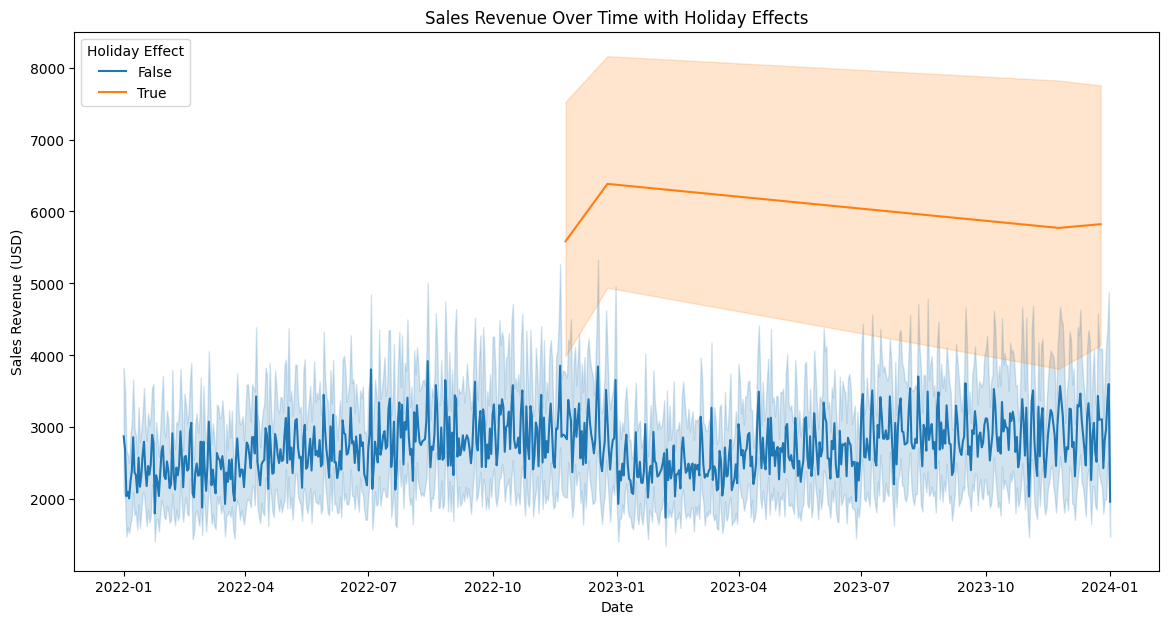

In [100]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Sales Revenue (USD)', hue='Holiday Effect', data=sales_df)
plt.title('Sales Revenue Over Time with Holiday Effects')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.legend(title='Holiday Effect')
plt.show()

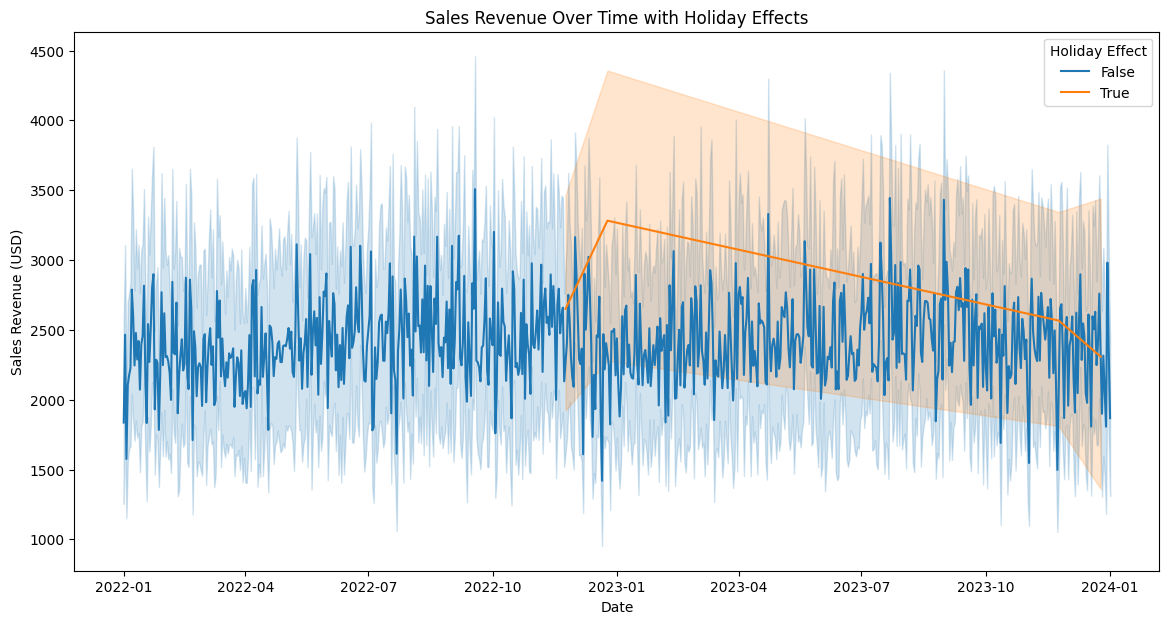

In [91]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Sales Revenue (USD)', hue='Holiday Effect', data=cleaned_df)
plt.title('Sales Revenue Over Time with Holiday Effects')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.legend(title='Holiday Effect')
plt.show()

0.007944029712602262

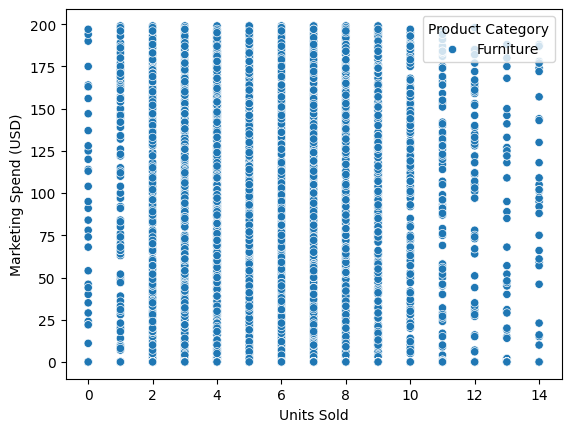

In [51]:
cleaned_df.columns
# cleaned_df = cleaned_df.drop(['Store ID', 'Day of the Week', 'Store Location'], axis=1)
sns.scatterplot(data=cleaned_df[cleaned_df['Product Category'] == 'Furniture'], x='Units Sold', y='Marketing Spend (USD)', hue='Product Category')

cleaned_df[cleaned_df['Product Category'] == 'Furniture']['Units Sold'].corr(cleaned_df[cleaned_df['Product Category'] == 'Furniture']['Marketing Spend (USD)'])

#5 Do Feature Extraction before using PCA

<Axes: xlabel='Day of the Week', ylabel='Units Sold'>

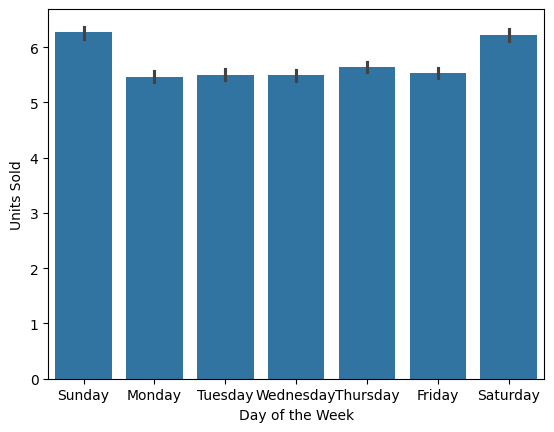

In [36]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']
sns.barplot(data=cleaned_df, x='Day of the Week', y='Units Sold')
# cleaned_df.info()

<Axes: xlabel='Weekend/Weekday', ylabel='Units Sold'>

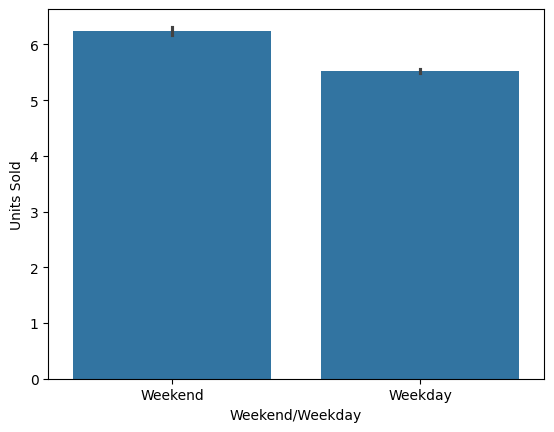

In [44]:
reduced_df = cleaned_df.copy()
reduced_df['Weekend/Weekday'] = reduced_df['Day of the Week'].apply(lambda x: 'Weekend' if x in weekend else 'Weekday')

reduced_df = reduced_df.drop(['Day of the Week'], axis=1)
sns.barplot(data=reduced_df, x='Weekend/Weekday', y='Units Sold')

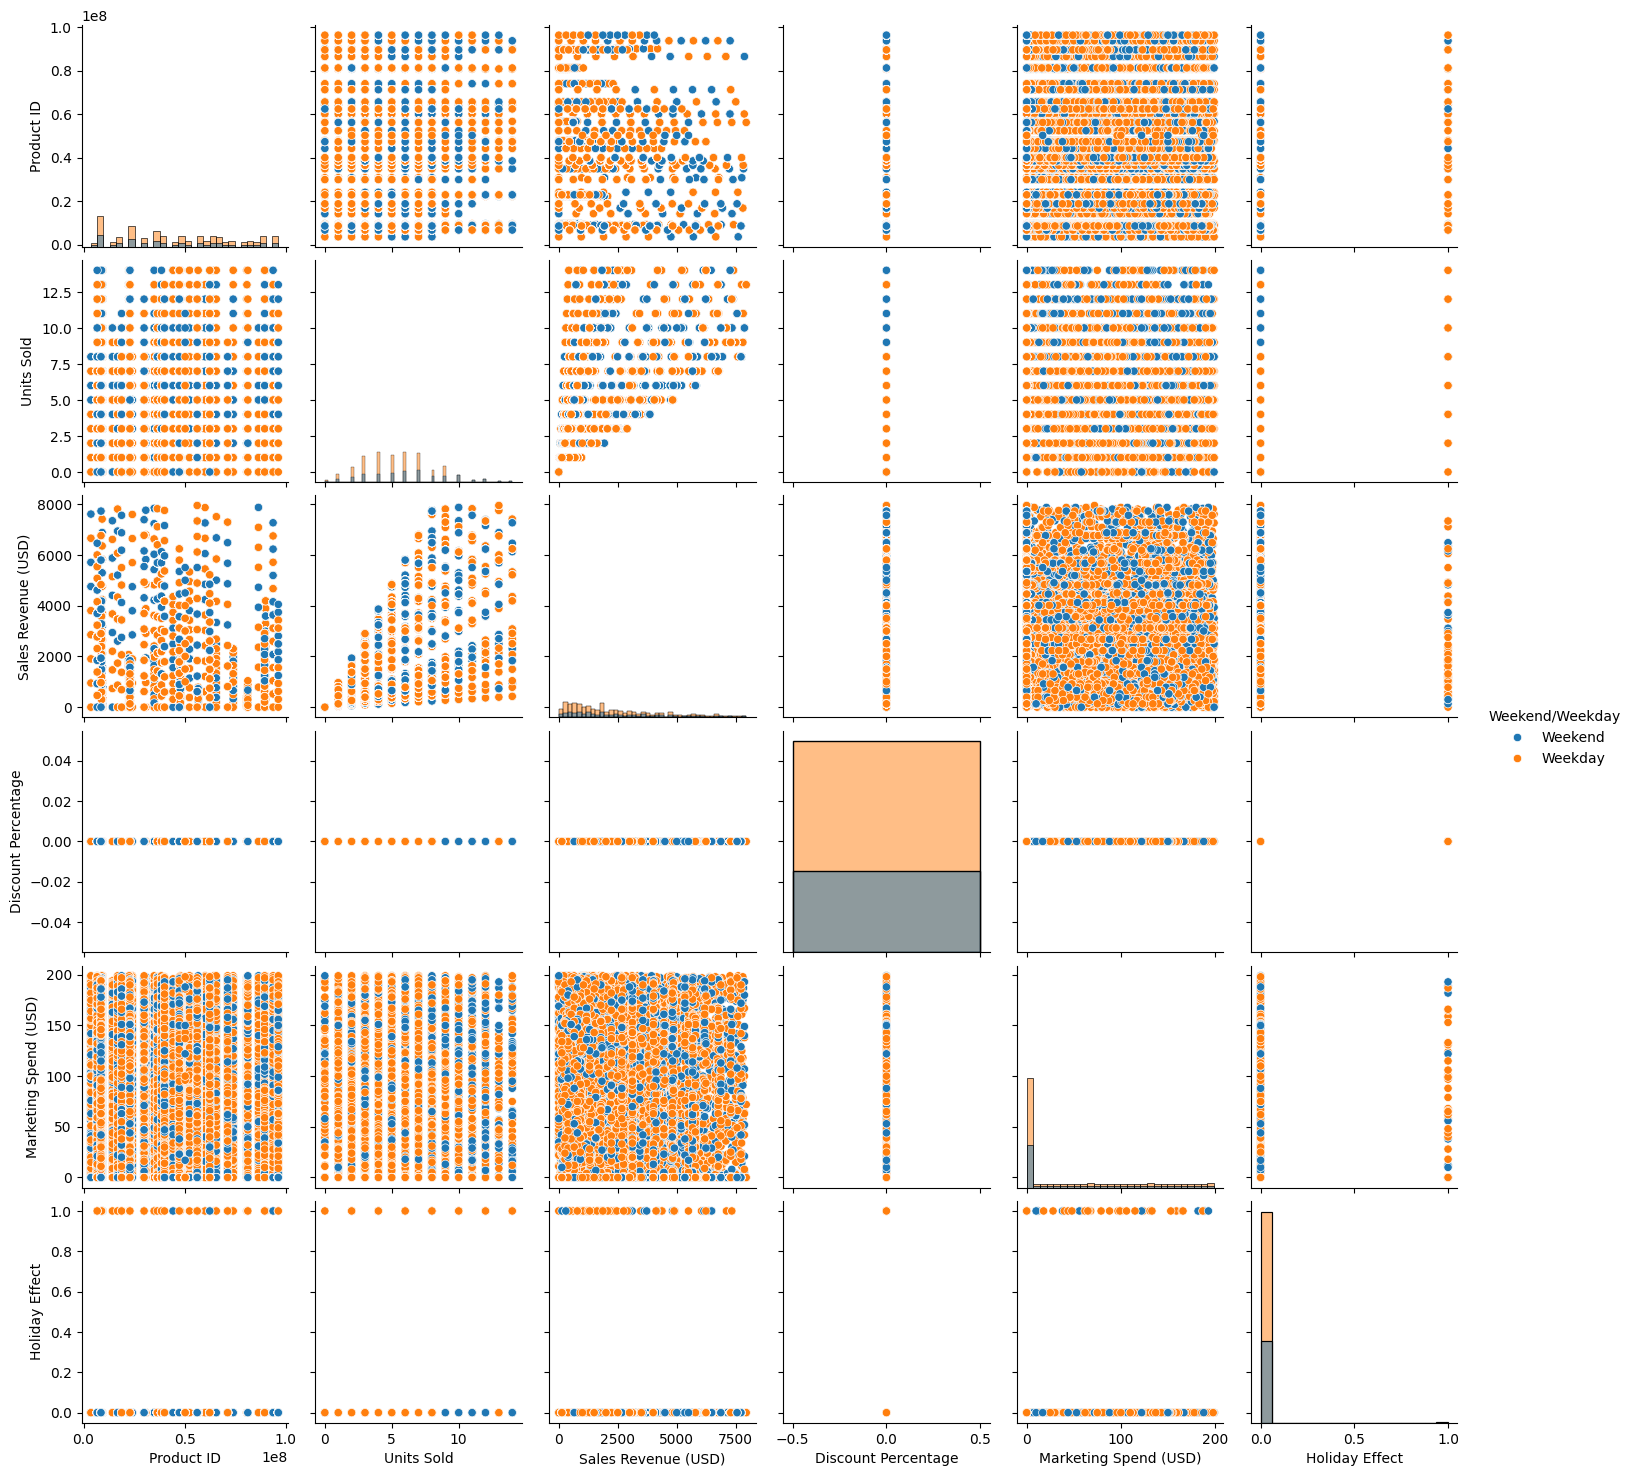

In [45]:
sns.pairplot(reduced_df, hue='Weekend/Weekday', diag_kind='hist')


<Axes: xlabel='Units Sold', ylabel='Sales Revenue (USD)'>

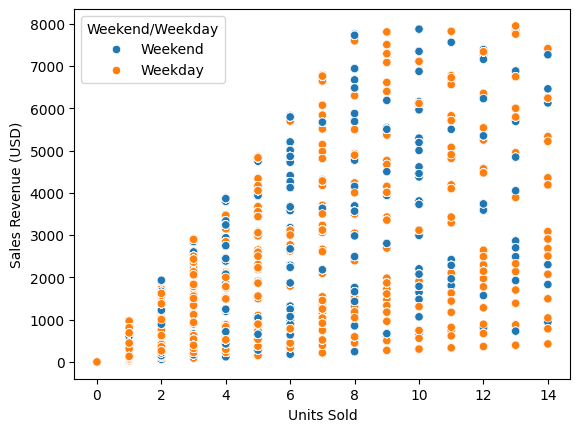

In [46]:
sns.scatterplot(data=reduced_df, x='Units Sold', y='Sales Revenue (USD)', hue='Weekend/Weekday')

[0.49635619 0.33332092 0.17032289 0.        ]


<Axes: xlabel='PC 1', ylabel='PC 2'>

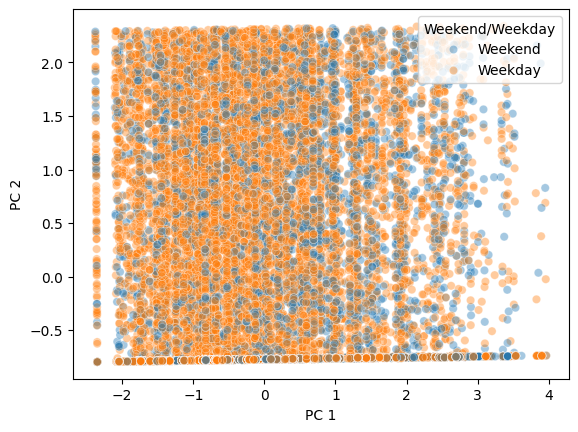

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
reduced_std = scaler.fit_transform(reduced_df[['Units Sold', 'Sales Revenue (USD)', 'Discount Percentage', 'Marketing Spend (USD)']])

pca = PCA()
pc = pca.fit_transform(reduced_std)
print(pca.explained_variance_ratio_)

reduced_df['PC 1'] = pc[:, 0]
reduced_df['PC 2'] = pc[:, 1]
reduced_df['PC 3'] = pc[:, 2]
reduced_df['PC 4'] = pc[:, 3]

sns.scatterplot(data=reduced_df, x='PC 1', y='PC 2', hue='Weekend/Weekday', alpha=0.4)


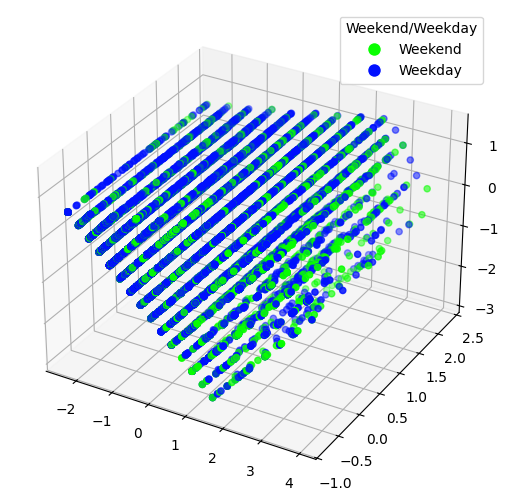

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

column_3d = reduced_df['Weekend/Weekday'].unique()
pallete = sns.color_palette('hsv', len(column_3d))
color_map = dict(zip(column_3d, pallete))

colors = reduced_df['Weekend/Weekday'].map(color_map)

sc = ax.scatter(reduced_df['PC 1'], reduced_df['PC 2'], reduced_df['PC 3'], c=colors,)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]

ax.legend(handles, column_3d, title='Weekend/Weekday')
plt.show()







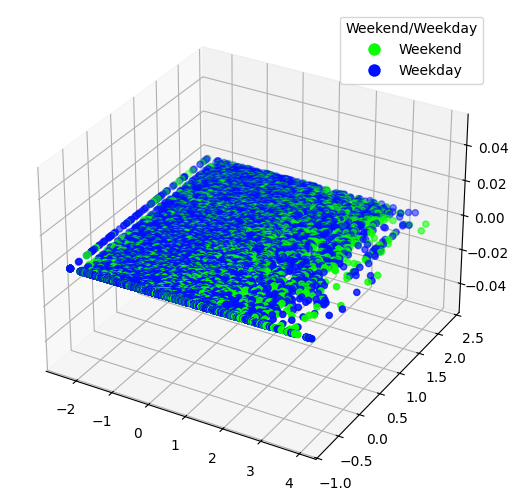

In [75]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

column_3d = reduced_df['Weekend/Weekday'].unique()
pallete = sns.color_palette('hsv', len(column_3d))
color_map = dict(zip(column_3d, pallete))

colors = reduced_df['Weekend/Weekday'].map(color_map)

sc = ax.scatter(reduced_df['PC 1'], reduced_df['PC 2'], reduced_df['PC 4'], c=colors,)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]

ax.legend(handles, column_3d, title='Weekend/Weekday')
plt.show()

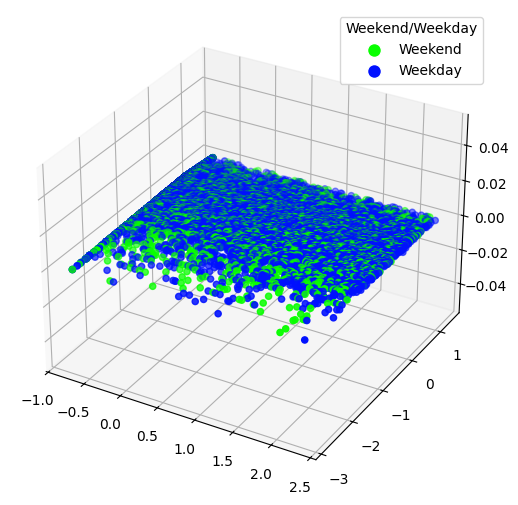

In [76]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

column_3d = reduced_df['Weekend/Weekday'].unique()
pallete = sns.color_palette('hsv', len(column_3d))
color_map = dict(zip(column_3d, pallete))

colors = reduced_df['Weekend/Weekday'].map(color_map)

sc = ax.scatter(reduced_df['PC 2'], reduced_df['PC 3'], reduced_df['PC 4'], c=colors,)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]

ax.legend(handles, column_3d, title='Weekend/Weekday')
plt.show()

<Axes: xlabel='PC 1', ylabel='PC 2'>

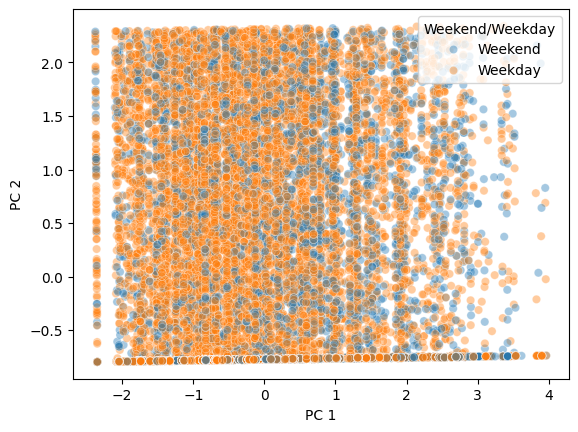

In [81]:
sns.scatterplot(data=reduced_df, x='PC 1', y='PC 2', hue='Weekend/Weekday', alpha=0.4)

<Axes: xlabel='Marketing Spend (USD)', ylabel='Sales Revenue (USD)'>

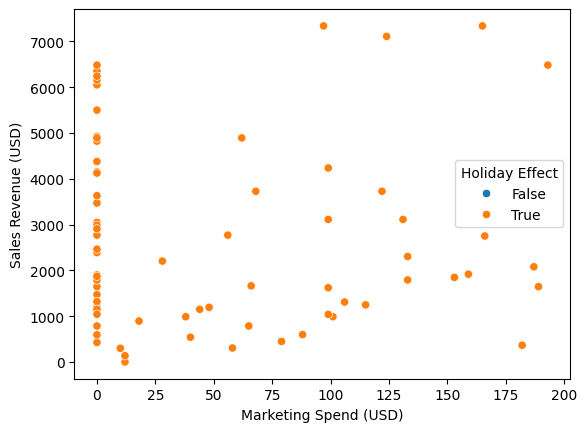

In [87]:
sns.scatterplot(data=reduced_df[reduced_df['Holiday Effect'] == True] ,x='Marketing Spend (USD)', y='Sales Revenue (USD)', hue=reduced_df['Holiday Effect'])

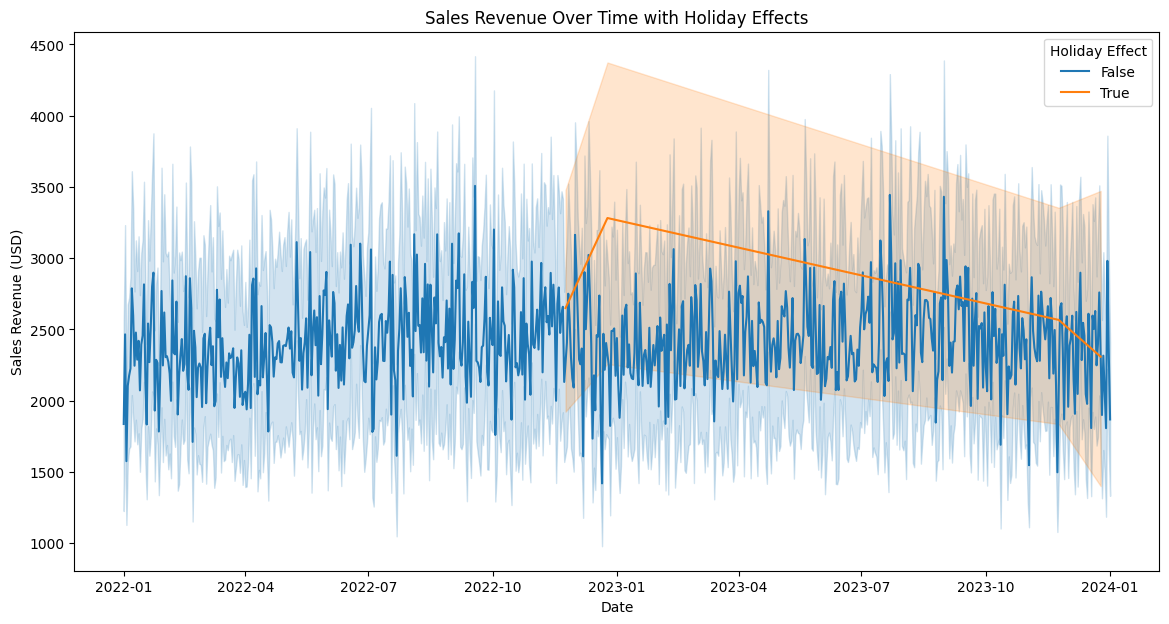

In [92]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Sales Revenue (USD)', hue='Holiday Effect', data=reduced_df)
plt.title('Sales Revenue Over Time with Holiday Effects')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.legend(title='Holiday Effect')
plt.show()

[3.36473139e-01 3.33319477e-01 3.30207384e-01 8.09887844e-17]


<Axes: xlabel='PC 1', ylabel='PC 2'>

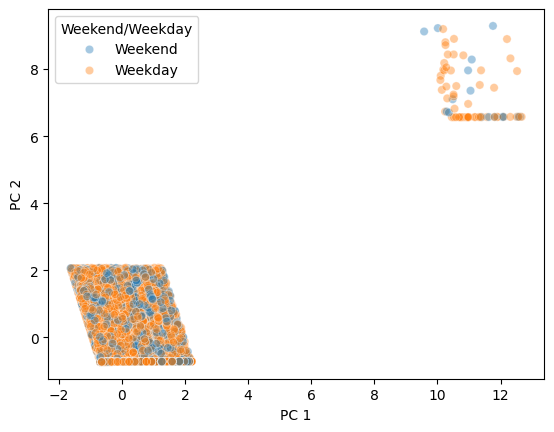

In [93]:
scaler = StandardScaler()
reduced_std = scaler.fit_transform(reduced_df[['Sales Revenue (USD)', 'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']])

pca = PCA()
pc = pca.fit_transform(reduced_std)
print(pca.explained_variance_ratio_)

reduced_df['PC 1'] = pc[:, 0]
reduced_df['PC 2'] = pc[:, 1]
reduced_df['PC 3'] = pc[:, 2]
reduced_df['PC 4'] = pc[:, 3]

sns.scatterplot(data=reduced_df, x='PC 1', y='PC 2', hue='Weekend/Weekday', alpha=0.4)

<Axes: xlabel='PC 1', ylabel='PC 3'>

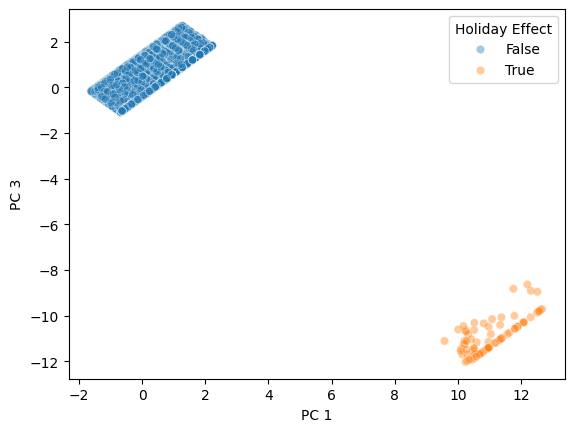

In [108]:
sns.scatterplot(data=reduced_df, x='PC 1', y='PC 3', hue='Holiday Effect', alpha=0.4)


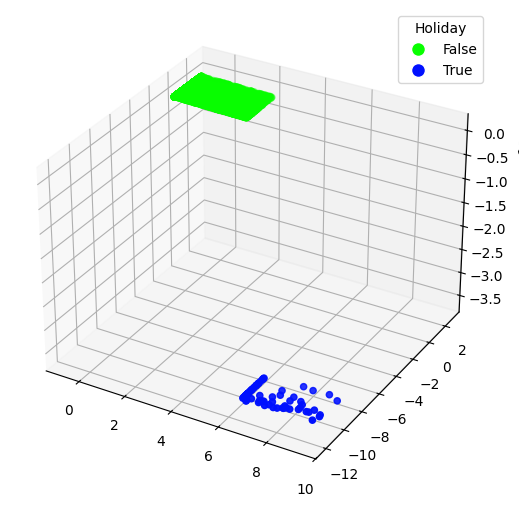

In [114]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

column_3d = reduced_df['Holiday Effect'].unique()
pallete = sns.color_palette('hsv', len(column_3d))
color_map = dict(zip(column_3d, pallete))

colors = reduced_df['Holiday Effect'].map(color_map)
sc = ax.scatter(reduced_df['PC 2'], reduced_df['PC 3'], reduced_df['PC 4'], c=colors,)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]

ax.legend(handles, column_3d, title='Holiday')
plt.show()